In [2]:
import pandas as pd
import numpy as np
from StringIO import StringIO
from zipfile import ZipFile
from urllib import urlopen
import requests
import csv
import matplotlib.pylab as plt
import seaborn as sns
import pylab as pylab
%matplotlib inline

/Users/daraperl/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def unzip_read_file(year):
    url = urlopen("http://www.nyc.gov/html/nypd/downloads/zip/analysis_and_planning/{}_sqf_csv.zip".format(year))
    zipfile = ZipFile(StringIO(url.read()))
    try:
        with zipfile.open("{}.csv".format(year)) as file:
            df = pd.read_csv(file)
    except: # 2015 csv name is different format than all the rest...go figure.
        with zipfile.open("{}_sqf_csv.csv".format(year)) as file:
            df = pd.read_csv(file)
    return df

In [4]:
df = pd.DataFrame()
df = df.append(unzip_read_file(2015), ignore_index=True)


In [ ]:
# This will capture all data. Loading may take a while and will consume a fair amount of memory. Recommended 16GB 
# of memory if you want to run this cell...

#
for year in range(2003, 2016):
    df = df.append(unzip_read_file(year), ignore_index=True)

In [127]:
df.keys()

['2003',
 '2006',
 '2007',
 '2004',
 '2005',
 '2015',
 '2014',
 '2008',
 '2009',
 '2011',
 '2010',
 '2013',
 '2012']

In [22]:
df_sqf = pd.DataFrame.from_dict(df, orient='index')

In [23]:
df_sqf.columns = ['Count']

In [28]:
df_sqf = df_sqf.sort()

/opt/ds/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


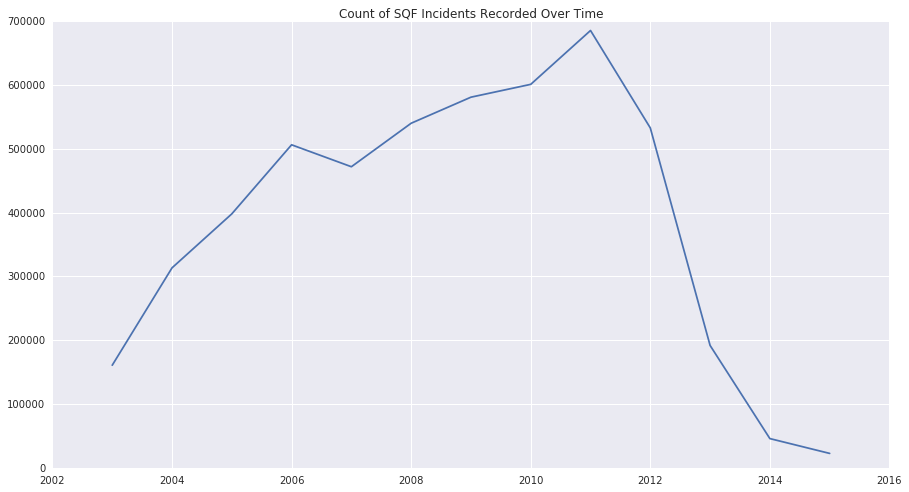

In [48]:
sns.set(color_codes=True)
plt.figure(figsize=(15,8))
plt.plot(df_sqf)
plt.title('Count of SQF Incidents Recorded Over Time')

In [49]:
races = {'A': 'ASIAN/PACIFIC ISLANDER',
 'B': 'BLACK',
 'I': 'AMERICAN INDIAN/ALASKAN NATIVE',
 'P': 'BLACK-HISPANIC',
 'Q': 'WHITE-HISPANIC',
 'W': 'WHITE',
 'X': 'UNKNOWN',
 'Z': 'OTHER'}

In [72]:
def read_race_count_2010(year):
    file_path = 'data/{}.csv'.format(year)
    with open(file_path, 'r') as csv_file:
        reader = csv.reader(csv_file,delimiter = ",")
        race_count = {'A':0,
        'B':0,
        'I':0,
        'P':0,
        'Q':0,
        'W':0,
        'X':0,
        'Z':0,
        'Not Listed':0}
        for row in reader:
            for key in race_count.keys():
                if row[80] == key:
                    race_count[key] += 1
        return race_count

In [69]:
def read_race_count(year):
    file_path = 'data/{}.csv'.format(year)
    with open(file_path, 'r') as csv_file:
        reader = csv.reader(csv_file,delimiter = ",")
        race_count = {'A':0,
        'B':0,
        'I':0,
        'P':0,
        'Q':0,
        'W':0,
        'X':0,
        'Z':0,
        'Not Listed':0}
        for row in reader:
            for key in race_count.keys():
                if row[81] == key:
                    race_count[key] += 1
        return race_count

In [70]:
df_racecount = {}
for year in range(2003, 2016):
    df_racecount['{}'.format(year)] = read_race_count(year)

In [73]:
for year in range(2003, 2011):
    df_racecount['{}'.format(year)] = read_race_count_2010(year)

In [76]:
df_sqf_race = pd.DataFrame.from_dict(df_racecount, orient='index')

In [188]:
df_sqf_race = df_sqf_race[(df_sqf_race.T != 0).any()]
df_sqf_race.columns = ['Asian-Pacific Islander','Black-Hispanic','Black','White-Hispanic','White','Not Listed','American Indian/Alaskan Native','Unknown','Other']

races = {'A': 'ASIAN/PACIFIC ISLANDER',
 'B': 'BLACK',
 'I': 'AMERICAN INDIAN/ALASKAN NATIVE',
 'P': 'BLACK-HISPANIC',
 'Q': 'WHITE-HISPANIC',
 'W': 'WHITE',
 'X': 'UNKNOWN',
 'Z': 'OTHER'}

df_sqf_race

,Asian-Pacific Islander,Black-Hispanic,Black,White-Hispanic,White,Not Listed,American Indian/Alaskan Native,Unknown,Other
2003,4138,8168,77704,36413,17623,0,416,2136,14089
2004,8526,16469,155033,73468,28913,0,1161,0,29943
2005,11859,21635,196570,93453,40713,0,1620,1,32260
2007,13150,27831,243766,114037,52887,0,1762,0,18202
2008,16491,32513,275588,135962,57650,0,2031,0,16730
2009,16845,35207,310611,144848,53601,0,2271,0,14346
2010,19732,38689,315083,150637,54810,0,2579,0,15360
2011,23932,48438,350743,175302,61805,0,2897,0,16867
2012,17058,35772,284229,129368,50366,0,2257,0,10102
2013,6845,12271,104449,42659,20820,0,818,0,2844


In [183]:
df_sqf_race = df_sqf_race[(df_sqf_race != 0).any(axis=1)]

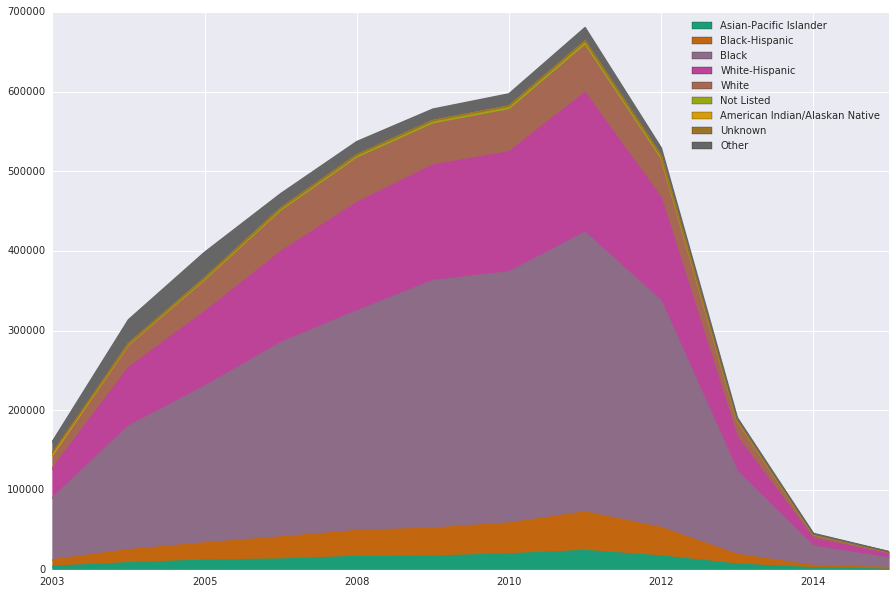

In [185]:
plt.figure(figsize=(10,10))
df_sqf_race.plot.area(figsize=(15,10), colormap='Dark2')


In [190]:
def arrest_count(year):
    file_path = 'data/{}.csv'.format(year)
    with open(file_path, 'r') as csv_file:
        reader = csv.reader(csv_file,delimiter = ",")
        arrest_count={
            'Y': 0,
            'N': 0
        }
        for row in reader:
            if row[14] == 'Y':
                arrest_count['Y'] += 1
            elif row[14] == 'N':
                arrest_count['N'] += 1
                
        return arrest_count

In [191]:
df_arrestcount = {}
for year in range(2003, 2016):
    df_arrestcount['{}'.format(year)] = arrest_count(year)

In [195]:
pd_arrests = pd.DataFrame(df_arrestcount)

In [201]:
pd_arrests

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
N,148366,297168,379128,485544,444464,508096,546249,560201,644841,500596,176408,38889,18595
Y,12485,16354,19063,20947,27632,32206,34919,41084,40883,32315,15443,6898,3968


In [204]:
pd_arrests = pd_arrests.T

In [213]:
pd_arrests['Total'] = pd_arrests['N']+pd_arrests['Y']

In [214]:
pd_arrests['Arrest Rate'] = pd_arrests['Y']/pd_arrests['Total']

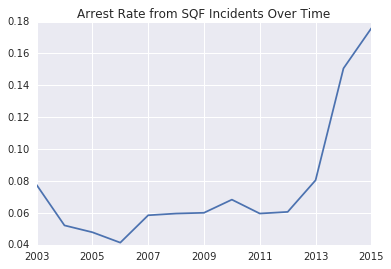

In [215]:
pd_arrests['Arrest Rate'].plot(title='Arrest Rate from SQF Incidents Over Time')

In [216]:
pd_arrests

,N,Y,Total,Arrest Rate
2003,148366,12485,160851,0.077618
2004,297168,16354,313522,0.052162
2005,379128,19063,398191,0.047874
2006,485544,20947,506491,0.041357
2007,444464,27632,472096,0.058530
2008,508096,32206,540302,0.059607
2009,546249,34919,581168,0.060084
2010,560201,41084,601285,0.068327
2011,644841,40883,685724,0.059620
2012,500596,32315,532911,0.060639
